In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df2 = df[df['smoker'] == 'yes'][['sex','bmi','age','children','region','charges']]

In [5]:
df2.head(2)

,sex,bmi,age,children,region,charges
0,female,27.90,19,0,southwest,16884.9240
11,female,26.29,62,0,southeast,27808.7251


In [6]:
import seaborn as sns

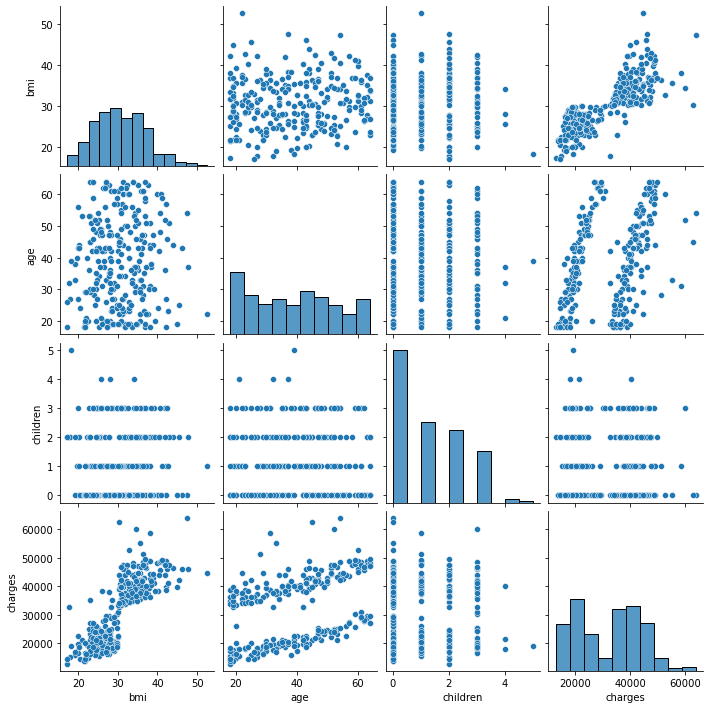

In [7]:
sns.pairplot(df2)

In [9]:
corr = df2.corr()
corr.style.background_gradient()

,bmi,age,children,charges
bmi,1.000000,0.059674,-0.012619,0.806481
age,0.059674,1.000000,0.081183,0.368224
children,-0.012619,0.081183,1.000000,0.035945
charges,0.806481,0.368224,0.035945,1.000000


In [26]:
def Bmi_classifier(row):
    if row['bmi'] < 18.5:
        return 'Underweight'
    elif row['bmi'] < 25 :
        return 'Normal'
    elif row['bmi'] < 30:
        return 'Overweight'
    else:
        return 'Obese'

In [27]:
def Age_classifier(row):
    if row['age'] <17:
        return 'Child'
    elif row['age'] <31:
        return 'Young-Adult'
    elif row['age'] < 46:
        return 'Middel-aged'
    else:
        return 'Old-aged'

In [30]:
df2['bmi_status'] = df2.apply(Bmi_classifier,axis=1)

In [31]:
df2['age_status'] = df2.apply(Age_classifier,axis=1)

In [33]:
df2.drop(['age','bmi'],axis=1)
df2.head(2)

,sex,bmi,age,children,region,charges,bmi_status,age_status
0,female,27.90,19,0,southwest,16884.9240,Overweight,Young-Adult
11,female,26.29,62,0,southeast,27808.7251,Overweight,Old-aged


In [34]:
df3 = pd.get_dummies(df2,columns=['sex','region','bmi_status','age_status'])

In [35]:
df3.head(2)

,bmi,age,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,bmi_status_Normal,bmi_status_Obese,bmi_status_Overweight,bmi_status_Underweight,age_status_Middel-aged,age_status_Old-aged,age_status_Young-Adult
0,27.90,19,0,16884.9240,1,0,0,0,0,1,0,0,1,0,0,0,1
11,26.29,62,0,27808.7251,1,0,0,0,1,0,0,0,1,0,0,1,0


In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 1337
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bmi                     274 non-null    float64
 1   age                     274 non-null    int64  
 2   children                274 non-null    int64  
 3   charges                 274 non-null    float64
 4   sex_female              274 non-null    uint8  
 5   sex_male                274 non-null    uint8  
 6   region_northeast        274 non-null    uint8  
 7   region_northwest        274 non-null    uint8  
 8   region_southeast        274 non-null    uint8  
 9   region_southwest        274 non-null    uint8  
 10  bmi_status_Normal       274 non-null    uint8  
 11  bmi_status_Obese        274 non-null    uint8  
 12  bmi_status_Overweight   274 non-null    uint8  
 13  bmi_status_Underweight  274 non-null    uint8  
 14  age_status_Middel-aged  274 non-null    u

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df3.drop('charges',axis=1)

In [39]:
y = df3['charges']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 530 to 852
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bmi                     219 non-null    float64
 1   age                     219 non-null    int64  
 2   children                219 non-null    int64  
 3   sex_female              219 non-null    uint8  
 4   sex_male                219 non-null    uint8  
 5   region_northeast        219 non-null    uint8  
 6   region_northwest        219 non-null    uint8  
 7   region_southeast        219 non-null    uint8  
 8   region_southwest        219 non-null    uint8  
 9   bmi_status_Normal       219 non-null    uint8  
 10  bmi_status_Obese        219 non-null    uint8  
 11  bmi_status_Overweight   219 non-null    uint8  
 12  bmi_status_Underweight  219 non-null    uint8  
 13  age_status_Middel-aged  219 non-null    uint8  
 14  age_status_Old-aged     219 non-null    

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
clf = LinearRegression()

In [44]:
model1 = clf.fit(X_train,y_train)

In [46]:
model1.score(X_train,y_train)

0.9092563916043335

In [47]:
model1.score(X_test,y_test)

0.8744659318802137

In [49]:
from sklearn import linear_model

In [50]:
c = linear_model.Lasso(alpha=0.1)

In [51]:
model2 = c.fit(X_train,y_train)

In [52]:
model2.score(X_test,y_test)

0.8744919822641272

In [53]:
model2.score(X_test,y_test)

0.8744919822641272